# 1. Drone specifications
# 2. Data to Graph
# 3. Random slope
# 4. Fix all codes accordingly  
# 5. Solomon conversion to callibrate

# 6. Initial tour generation (fix and write)
# 7. write the conversion and slope.
# 8. Validate one graph and save it.

# 9. new proposals and write them.
# 10. exact solution
# 11. data tally: 
#    how many feasible/unfeasible solutions are produced?
#    how many times does each node used in feasible/unfeasible tours? 
#    how many times each operation is selected, objective change in percentage?
#    socp failure reason


# TODO: keep tally to track methods and choosen methods
# TODO: keep tally: which vertex, how many times used in tour. Heat plot.
 

In [1]:
from uav_routing.environment.data import data_to_dict, save, load, to_dataframe
from uav_routing.environment.graph import dict_to_graph, nearest_neighbors_cycle
from uav_routing.environment.drone import Drone

In [6]:
path = "/Users/kirtisoglu/Documents/GitHub/UAV-Routing/datasets/data/50_c101.txt"
path_2 = "/Users/kirtisoglu/Documents/GitHub/UAV-Routing/datasets/data/50_r101.txt"
path_3 = "/Users/kirtisoglu/Documents/GitHub/UAV-Routing/datasets/50_rc101.txt"
path4 = "/Users/kirtisoglu/Documents/GitHub/UAV-Routing/datasets/data/pr17.txt"
path5 = "/Users/kirtisoglu/Documents/GitHub/UAV-Routing/datasets/data/pr07.txt"
path6="/Users/kirtisoglu/Documents/GitHub/UAV-Routing/datasets/data/r101.txt"
pdf1 = to_dataframe(path)

AttributeError: 'tuple' object has no attribute 'values'

In [1]:
from uav_routing.environment import build_environment

import pickle
path = '/Users/kirtisoglu/Documents/GitHub/UAV-Routing/datasets/data/50_c101.txt'

def prepare_and_save_env(data_path, node_ratio=0.5):
    # 1. Create and Calibrate
    graph, drone, report = build_environment(data_path, node_ratio=node_ratio)
    
    # 2. Save for later use
    with open('calibrated_env.pkl', 'wb') as f:
        pickle.dump({'graph': graph, 'drone': drone, 'report': report}, f)
    print("Environment saved to calibrated_env.pkl")

prepare_and_save_env(path)

l 25
cycle nodes [0, 20, 21, 22, 23, 26, 28, 27, 25, 24, 29, 30, 34, 36, 39, 38, 37, 35, 31, 32, 33, 50, 48, 45, 44, 42]
cycle edges [(0, 20), (20, 21), (21, 22), (22, 23), (23, 26), (26, 28), (28, 27), (27, 25), (25, 24), (24, 29), (29, 30), (30, 34), (34, 36), (36, 39), (39, 38), (38, 37), (37, 35), (35, 31), (31, 32), (32, 33), (33, 50), (50, 48), (48, 45), (45, 44), (44, 42), (42, 0)]
speed 44.31
distance before calibration 135526.86986832478
time to complete the tour before calibration 3058.6068577820984
data campaign time 1236.0
factor 2.474601017623057
random node 40
time window of u before scaling [264.0, 321.0]
lowest info at u before scaling 10.0
time window of u after scaling [653.2946686524871, 794.3469266570013]
lowest info at u after scaling 24.74601017623057
tour time 3058.6068577820984
campaign time 3058.6068577820984
Environment saved to calibrated_env.pkl


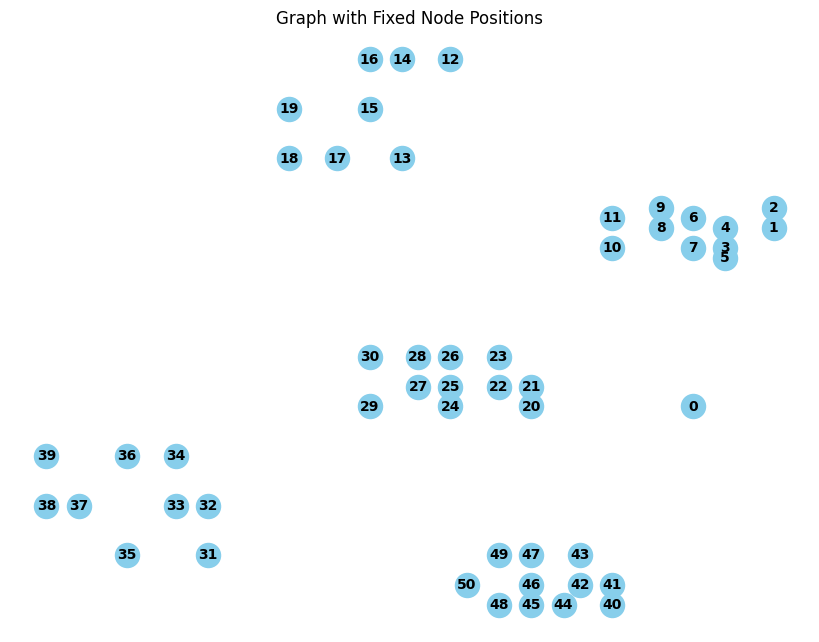

In [2]:
from uav_routing.environment.data import load
callibrated_path ="/Users/kirtisoglu/Documents/GitHub/UAV-Routing/uav_routing/notebooks/calibrated_env.pkl"
data = load(callibrated_path)

graph, drone = data['graph'], data['drone']

from uav_routing.environment.plot import plot_graph_with_positions
plot_graph_with_positions(graph.nodes, [])

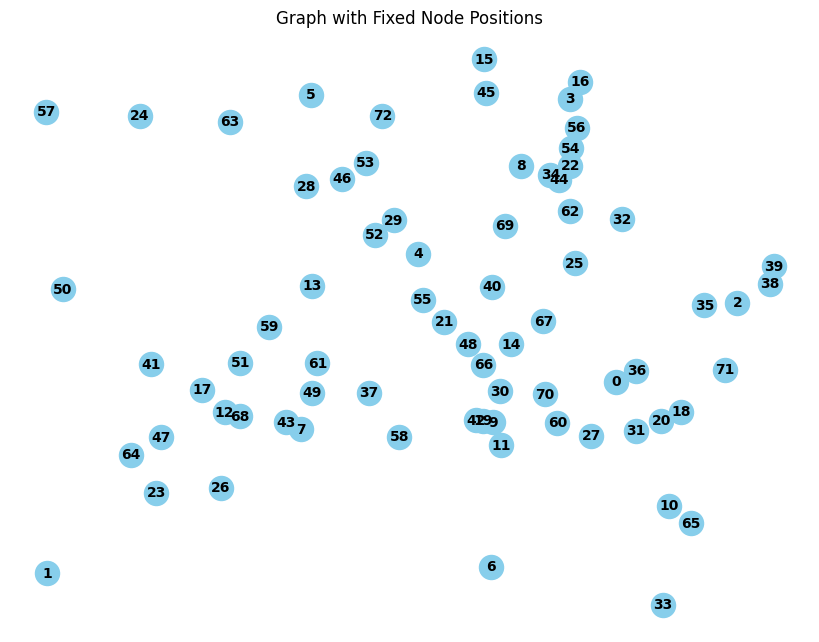

In [8]:
from uav_routing.environment.data import load
callibrated_path ="/Users/kirtisoglu/Documents/GitHub/UAV-Routing/uav_routing/notebooks/calibrated_env.pkl"
data = load(callibrated_path)

graph, drone = data['graph'], data['drone']

from uav_routing.environment.plot import plot_graph_with_positions
plot_graph_with_positions(graph.nodes, [])

In [8]:
nodes = [0, 20, 21, 22, 23, 26, 28, 27, 25, 24, 29, 30, 34, 36, 39, 38, 37, 35, 31, 32, 33, 50, 48, 45, 44, 42]
edges = [(0, 20), (20, 21), (21, 22), (22, 23), (23, 26), (26, 28), (28, 27), (27, 25), (25, 24), (24, 29), (29, 30), (30, 34), (34, 36), (36, 39), (39, 38), (38, 37), (37, 35), (35, 31), (31, 32), (32, 33), (33, 50), (50, 48), (48, 45), (45, 44), (44, 42), (42, 0)]
d = sum(graph.edges[e]['distance'] for e in edges)
d

135526.86986832478

In [4]:
time = d / 44.31
time

3058.6068577820984

In [15]:
drone.base

0

In [16]:
graph.nodes[0]

{'position': (40.0, 50.0),
 'info_at_lowest': 0.0,
 'time_window': [0.0, 3058.6068577820984],
 'info_slope': 0.0}

In [ ]:
graph.nodes[7]

{'position': (40.0, 66.0),
 'info_at_lowest': 49.49202035246114,
 'time_window': [420.6821729959197, 556.7852289651878],
 'info_slope': 0.2140183567786974}

In [19]:
graph.nodes[50]

{'position': (26.0, 32.0),
 'info_at_lowest': 24.74601017623057,
 'time_window': [2016.7998293627916, 2177.64889550829],
 'info_slope': -0.11504989543184022}

In [14]:
list(graph.nodes)

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50]

In [13]:
for node in nodes:
    
    pos = graph.nodes[node]['position']
    print(node, pos)

0 (40.0, 50.0)
20 (30.0, 50.0)
21 (30.0, 52.0)
22 (28.0, 52.0)
23 (28.0, 55.0)
26 (25.0, 55.0)
28 (23.0, 55.0)
27 (23.0, 52.0)
25 (25.0, 52.0)
24 (25.0, 50.0)
29 (20.0, 50.0)
30 (20.0, 55.0)
34 (8.0, 45.0)
36 (5.0, 45.0)
39 (0.0, 45.0)
38 (0.0, 40.0)
37 (2.0, 40.0)
35 (5.0, 35.0)
31 (10.0, 35.0)
32 (10.0, 40.0)
33 (8.0, 40.0)
50 (26.0, 32.0)
48 (28.0, 30.0)
45 (30.0, 30.0)
44 (32.0, 30.0)
42 (33.0, 32.0)


In [ ]:
for edge in edges:
    
    u = edge[0]
    v = edge[1]
    
print()

In [12]:
count = 0
for edge in edges:

    d = graph.edges[edge]['distance']
    time = d / 44.31

    energy = drone.energy_function(44.31, d)
    print(F"FOR EDGE {edge}, the energy is {energy}.")
    print("distance is ", d)
    count += energy
print("sum is", count)

FOR EDGE (0, 20), the energy is 3554889.6452372754.
distance is  10000.0
FOR EDGE (20, 21), the energy is 710977.929047455.
distance is  2000.0
FOR EDGE (21, 22), the energy is 710977.929047455.
distance is  2000.0
FOR EDGE (22, 23), the energy is 1066466.8935711826.
distance is  3000.0
FOR EDGE (23, 26), the energy is 1066466.8935711826.
distance is  3000.0
FOR EDGE (26, 28), the energy is 710977.929047455.
distance is  2000.0
FOR EDGE (28, 27), the energy is 1066466.8935711826.
distance is  3000.0
FOR EDGE (27, 25), the energy is 710977.929047455.
distance is  2000.0
FOR EDGE (25, 24), the energy is 710977.929047455.
distance is  2000.0
FOR EDGE (24, 29), the energy is 1777444.8226186377.
distance is  5000.0
FOR EDGE (29, 30), the energy is 1777444.8226186377.
distance is  5000.0
FOR EDGE (30, 34), the energy is 5552915.13991967.
distance is  15620.499351813309
FOR EDGE (34, 36), the energy is 1066466.8935711826.
distance is  3000.0
FOR EDGE (36, 39), the energy is 1777444.8226186377

In [7]:
drone.max_energy

48200251.01522189

In [3]:
report = data['report']
print(report)

    Node       Original TW                             Calibrated TW  \
0      0       [0, 1236.0]                 [0.0, 3058.6068577820984]   
1      1    [912.0, 967.0]    [2256.836128072228, 2392.939184041496]   
2      2    [825.0, 870.0]  [2041.5458395390222, 2152.9028853320597]   
3      3     [65.0, 146.0]   [160.8490661454987, 361.29174857296636]   
4      4    [727.0, 782.0]  [1799.0349398119624, 1935.1379957812305]   
5      5      [15.0, 67.0]  [37.119015264345855, 165.79826818074483]   
6      6    [621.0, 702.0]   [1536.7272319439185, 1737.169914371386]   
7      7    [170.0, 225.0]    [420.6821729959197, 556.7852289651878]   
8      8    [255.0, 324.0]    [631.0232594938796, 801.7707297098705]   
9      9    [534.0, 605.0]  [1321.4369434107125, 1497.1336156619495]   
10    10    [357.0, 410.0]   [883.4325632914314, 1014.5864172254534]   
11    11    [448.0, 505.0]   [1108.6212558951295, 1249.673513899644]   
12    12    [652.0, 721.0]   [1613.4398634902332, 1784.187333706

In [ ]:
plot_graph_with_positions(graph.nodes, C.edges)

In [3]:
pdf1

,position,info_at_lowest,time_window,info_slope
0,"(40.0, 50.0)",0.00,"[0, 1236]",None
1,"(45.0, 68.0)",10.00,"[912, 967]",None
2,"(45.0, 70.0)",30.00,"[825, 870]",None
3,"(42.0, 66.0)",10.00,"[65, 146]",None
4,"(42.0, 68.0)",10.00,"[727, 782]",None
5,"(42.0, 65.0)",10.00,"[15, 67]",None
6,"(40.0, 69.0)",20.00,"[621, 702]",None
7,"(40.0, 66.0)",20.00,"[170, 225]",None
8,"(38.0, 68.0)",20.00,"[255, 324]",None
9,"(38.0, 70.0)",10.00,"[534, 605]",None


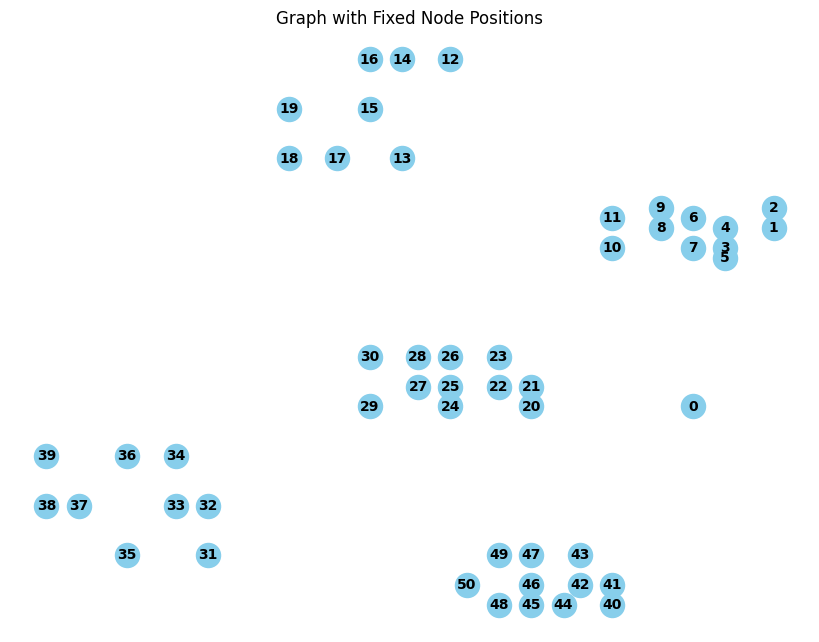

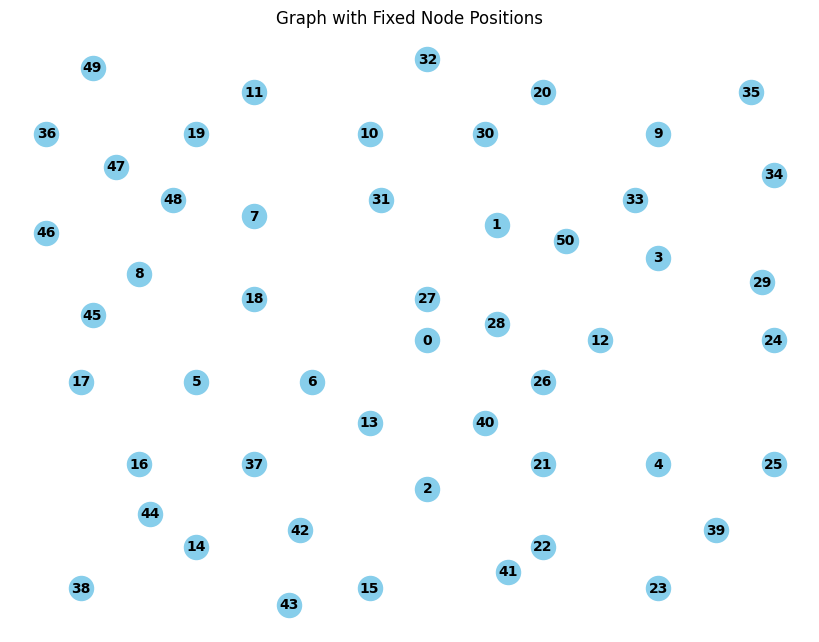

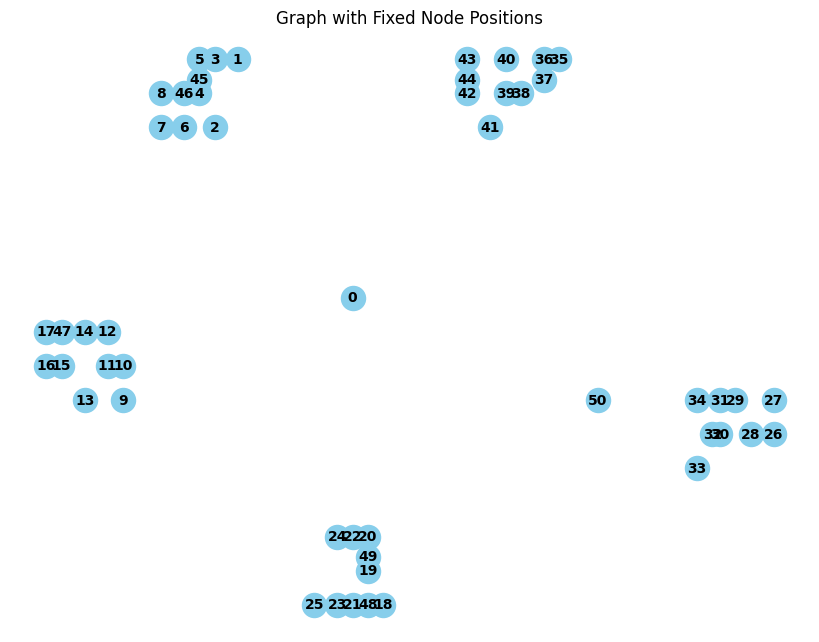

In [ ]:
from uav_routing.environment.plot import plot_graph_with_positions

plot_graph_with_positions(nodes_c, [])
plot_graph_with_positions(nodes_r, [])
plot_graph_with_positions(nodes_rc, [])